In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
close=pd.read_excel('原始数据.xlsx',sheet_name='收盘价')
PE=pd.read_excel('原始数据.xlsx',sheet_name='转股溢价率')
sum1=pd.read_excel('原始数据.xlsx',sheet_name='收盘价+转股溢价率')

In [4]:
doublelow=sum1.iloc[:,3:]
# [i.year for i in doublelow.columns]
# doublelow1=doublelow.T
# doublelow1['year']=[i.year for i in doublelow.columns]
# year_count=doublelow1.groupby(['year']).count()[0]
# doublelow_new=doublelow1.iloc[year_count[2017]+year_count[2018]+year_count[2019]+year_count[2020]:].drop(columns='year').T.set_index(PE.可转债代码)
# doublelow_new1=doublelow_new.replace(0, np.nan).T
doublelow_new1=doublelow.set_index(sum1.可转债代码).replace(0, np.nan).T
# doublelow_new1


close1=close.iloc[:,3:]
close_new=close1.set_index(close.可转债代码).replace(0, np.nan).T
# close_new=close_new.replace(100,np.nan)
close_new

可转债代码,127071.SZ,118018.SH,127068.SZ,127069.SZ,123156.SZ,113654.SH,113655.SH,123155.SZ,118017.SH,113653.SH,...,126301.SZ,100087.SH,125002.SZ,100220.SH,125898.SZ,100009.SH,125302.SZ,125301.SZ,100001.SH,125009.SZ
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,NaN,NaN,100.000,100.000,126.900,129.195,136.181,121.808,134.183,133.097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-07,NaN,NaN,125.400,132.560,128.181,128.274,136.101,121.800,137.423,133.931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-08,NaN,100.0,124.200,130.261,129.018,126.306,136.006,121.000,133.442,132.075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-09,NaN,100.0,123.702,131.850,127.040,126.371,138.549,120.498,131.525,132.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# doublelow=sum1.iloc[:,3:]
# # [i.year for i in doublelow.columns]
# doublelow1=doublelow.T
# doublelow1['year']=[i.year for i in doublelow.columns]
# year_count=doublelow1.groupby(['year']).count()[0]
# doublelow_new=doublelow1.iloc[year_count[2017]:].drop(columns='year').T.set_index(PE.可转债代码)
# doublelow_new1=doublelow_new.replace(0, np.nan).T
# doublelow_new1=doublelow.set_index(sum1.可转债代码).replace(0, np.nan).T
# doublelow_new1

In [6]:
# result1=pd.DataFrame(index=range(20))
# for i in range(0,len(doublelow_new1),5):
#     index1=close_new.iloc[i][close_new.iloc[i]!=100].index
#     temp=doublelow_new1.iloc[i][index1][doublelow_new1.iloc[i][index1]>70].sort_values()[:20].index
#     temp2=doublelow_new1.iloc[i:i+5][temp].T.reset_index().drop(columns='可转债代码')
#     result1=pd.concat([result1,temp2.T])



In [54]:
#双低策略
#每月初对应位置
months=[i.month for i in close_new.index]
num=[]
for i in range(1,len(months)):
    if months[i] != months[i-1]:
        num.append(i)
num.insert(0,0)
num.append(len(months))
chushu=1
# result=pd.DataFrame(index=range(20))
result=pd.Series()
initial=100
for i in range(1,len(num)-1):
    index1=close_new.iloc[num[i-1]][close_new.iloc[num[i-1]]!=100].index
    temp=doublelow_new1.iloc[num[i-1]][index1].sort_values()[:20].index
    temp2=close_new.iloc[num[i-1]:num[i]][temp].T.reset_index().drop(columns='可转债代码').mean()

    # index_1=close_new.iloc[num[i]-1][close_new.iloc[num[i]-1]!=100].index
    # temp_=doublelow_new1.iloc[num[i]-1][index_1].sort_values()[:20].index
    # temp_2=close_new.iloc[num[i]-1][temp_].T.reset_index().drop(columns='可转债代码').mean()
    index_1=close_new.iloc[num[i]][close_new.iloc[num[i-1]]!=100].index
    temp_=doublelow_new1.iloc[num[i]][index1].sort_values()[:20].index
    temp_2=close_new.iloc[num[i]:num[i+1]][temp].T.reset_index().drop(columns='可转债代码').mean()
#     chushu其实是每个月收益率累乘
    chushu=chushu*temp2[-1]/temp2[0]
    if i==1:
        result=pd.concat([result,temp2])
    elif i!=1:
        result=pd.concat([result,temp_2*chushu])
  



C:\Users\86182\AppData\Local\Temp\ipykernel_10564\763282286.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result=pd.Series()


In [55]:
result

2017-01-03    116.027500
2017-01-04    117.063000
2017-01-05    116.996500
2017-01-06    116.807437
2017-01-09    117.347875
                 ...    
2022-09-06    254.907015
2022-09-07    254.896647
2022-09-08    254.639947
2022-09-09    255.653000
2022-09-13    255.706526
Length: 1368, dtype: float64

In [70]:
#低价策略
result2=pd.Series()
initial=100
chushu=1
for i in range(1,len(num)-1):
    index1=close_new.iloc[num[i-1]][close_new.iloc[num[i-1]]!=100].index
    badtargetnum=close_new.iloc[num[i-1]][index1].notnull().sum()*0.03
    badgargetnum=int(badtargetnum)+1
    temp=close_new.iloc[num[i-1]][index1].sort_values()[badgargetnum:badgargetnum+20].index
    temp2=close_new.iloc[num[i-1]:num[i]][temp].T.reset_index().drop(columns='可转债代码').mean()
    
#     index_1=close_new.iloc[num[i]-1][close_new.iloc[num[i]-1]!=100].index
#     temp_=close_new.iloc[num[i]-1][index_1][close_new.iloc[num[i]-1][index_1]>70].sort_values()[:20].index
#     temp_2=close_new.iloc[num[i]-1][temp_].T.reset_index().drop(columns='可转债代码').mean()
    
    # chushu=(temp_2/temp2[-1])[0]
    # result2=pd.concat([result2,temp2/chushu])
    index_1=close_new.iloc[num[i]][close_new.iloc[num[i]-1]!=100].index
    badtargetnum=close_new.iloc[num[i-1]][index_1].notnull().sum()*0.03
    badgargetnum=int(badtargetnum)+1                                    
    temp_=close_new.iloc[num[i]][index_1].sort_values()[badgargetnum:badgargetnum+20].index
    temp_2=close_new.iloc[num[i]:num[i+1]][temp_].T.reset_index().drop(columns='可转债代码').mean()
                                          
    chushu=chushu*temp2[-1]/temp2[0]
    if i==1:
        result2=pd.concat([result2,temp2])
    elif i!=1:
        result2=pd.concat([result2,temp_2*chushu])                                

C:\Users\86182\AppData\Local\Temp\ipykernel_10564\1089476588.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result2=pd.Series()


In [71]:
result2

2017-01-03    116.562600
2017-01-04    117.636533
2017-01-05    117.568467
2017-01-06    117.374600
2017-01-09    117.954867
                 ...    
2022-09-06    163.287119
2022-09-07    163.757656
2022-09-08    163.479598
2022-09-09    163.828545
2022-09-13    163.554630
Length: 1368, dtype: float64

In [72]:
# zhishu=pd.read_excel('原始数据.xlsx',sheet_name='指数').set_index('日期')
# zhishu['000001.SH']

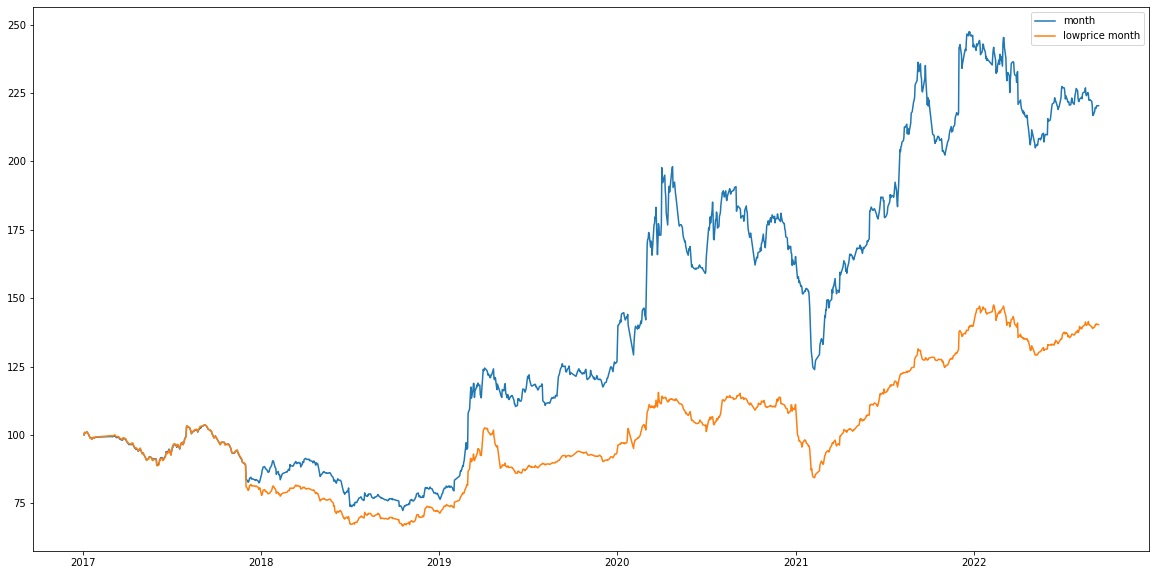

In [73]:
final=result
# final1=result1[20:].T.mean()
final2=result2

plt.figure(figsize=(20,10))

plt.plot(final.div(final[0])*100,label='month')
# plt.plot(final1.div(final1[0])*100,label='5days')

plt.plot(final2.div(final2[0])*100,label='lowprice month')

# plt.plot((zhishu['000001.SH'].div(zhishu['000001.SH'][0])*100),label='000001.SH')
# plt.plot((zhishu['000832.SH'].div(zhishu['000832.SH'][0])*100),label='000832.SH')

plt.legend()
plt.show()

In [332]:
def MaxDrawdown(return_list):
    a = np.maximum.accumulate(return_list)
    l = np.argmax((np.maximum.accumulate(return_list) - return_list) /np.maximum.accumulate(return_list))
    k = np.argmax(return_list[:l])
    return (return_list[k] - return_list[l])/(return_list[l])

return_list = list(final2)
mdd = MaxDrawdown(return_list)
print(mdd)


0.10508024661532485
